In [27]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("/kaggle/input/dwe-dataset/planets_after_LLM.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Object         135 non-null    object 
 1   Star           135 non-null    object 
 2   Star type      135 non-null    object 
 3   Mass (M⊕)      135 non-null    float64
 4   Radius (R⊕)    135 non-null    float64
 5   Flux (F⊕)      135 non-null    float64
 6   Teq (K)        135 non-null    float64
 7   Period (days)  135 non-null    float64
 8   Distance (ly)  135 non-null    float64
 9   Note           135 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.7+ KB
None
                          Object        Star Star type  Mass (M⊕)  \
0                     Kepler-69c   Kepler-69       G4V       2.14   
1                      Kepler-9d    Kepler-9         G       1.50   
2  Mars (reported for reference)         Sun       G2V       0.11   
3                   Gliese 180 d 

In [82]:
# Set style
sns.set_theme(style="whitegrid")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


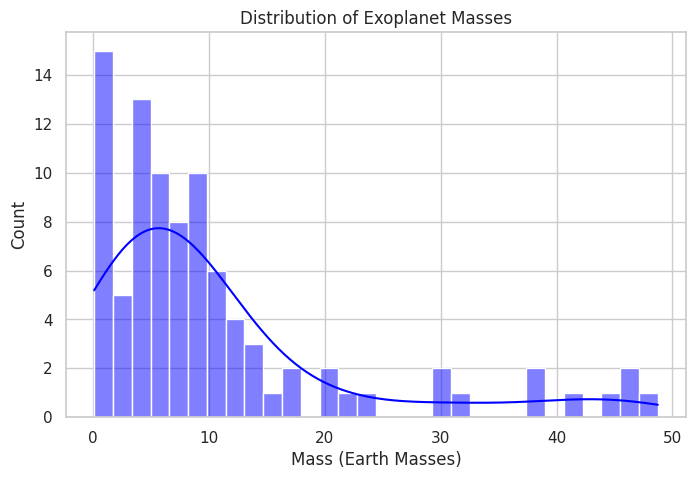

In [83]:
# Histogram of Exoplanet Mass
df_filtered = df[df['Mass (M⊕)'] < 50] 
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['Mass (M⊕)'], bins=30, kde=True, color='blue')
plt.xlabel("Mass (Earth Masses)")
plt.ylabel("Count")
plt.title("Distribution of Exoplanet Masses")
plt.show()

## The graph displays the frequency of exoplanets (planets outside our solar system) across different mass ranges, measured in Earth masses (where 1 Earth mass = the mass of Earth).

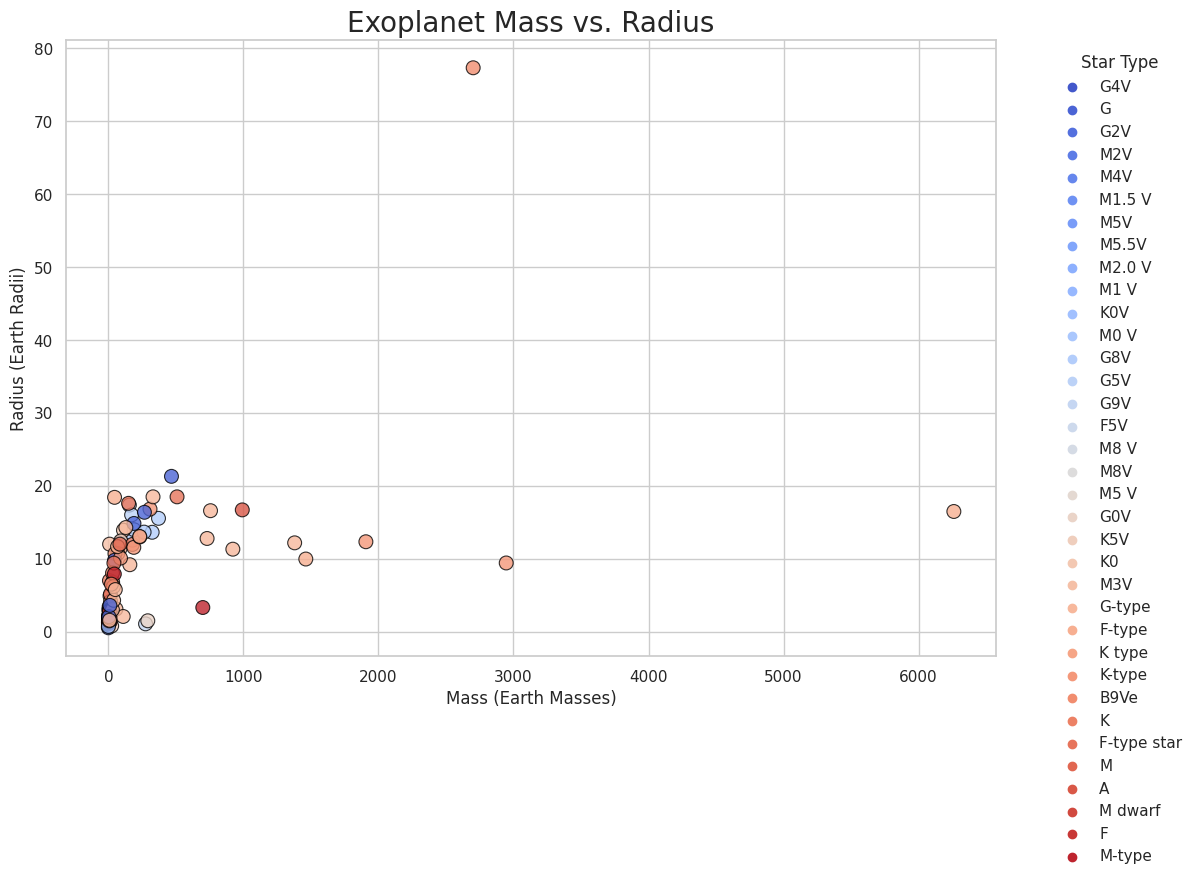

In [84]:
# Scatter plot of Mass vs Radius
plt.figure()
sns.scatterplot(x=df['Mass (M⊕)'], y=df['Radius (R⊕)'], hue=df['Star type'], palette='coolwarm', s=100, alpha=0.8, edgecolor='black')
plt.xlabel("Mass (Earth Masses)")
plt.ylabel("Radius (Earth Radii)")
plt.title("Exoplanet Mass vs. Radius", fontsize=20)
plt.legend(title="Star Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Spectral Types: Dominated by M-type (red dwarfs, e.g., M2V, M5V) and G-type stars (like our Sun, e.g., G2V, G5V), with some K-type and F-type stars.

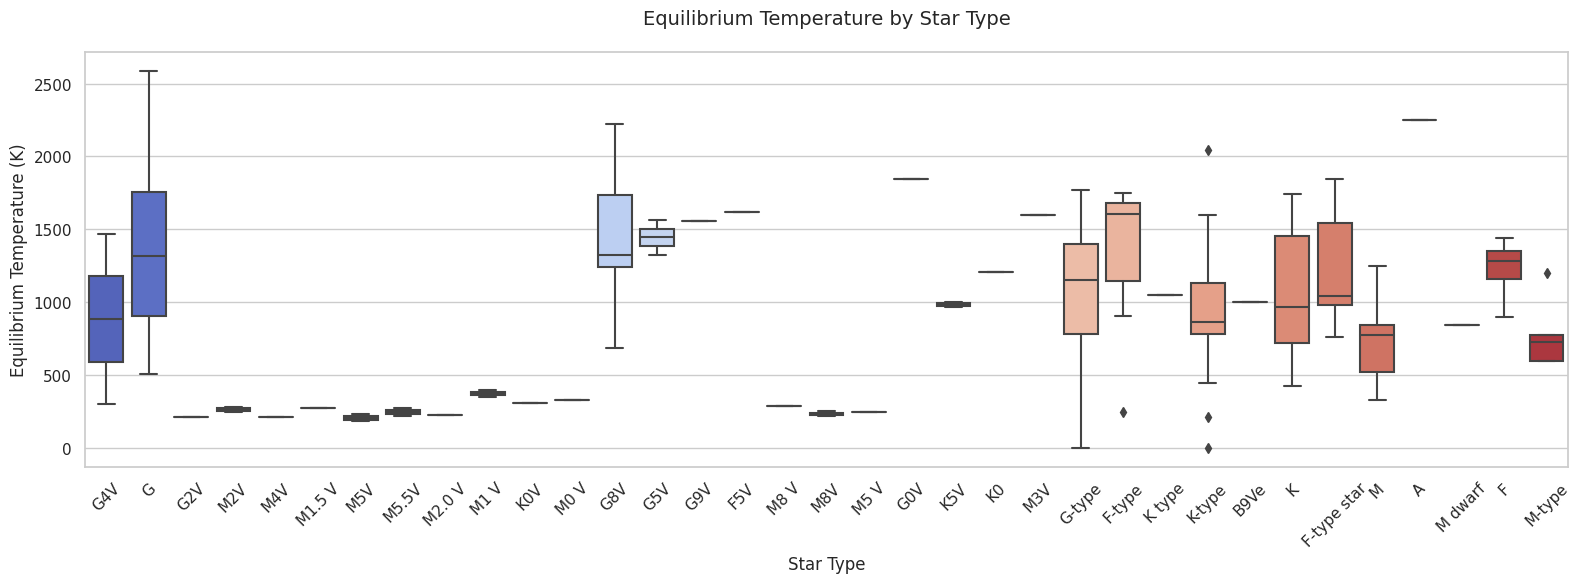

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.boxplot(x=df['Star type'], y=df['Teq (K)'], palette='coolwarm')
plt.xlabel('Star Type', fontsize=12)
plt.ylabel('Equilibrium Temperature (K)', fontsize=12)
plt.title('Equilibrium Temperature by Star Type', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### There is  a general increase in temperature from M → G → F → A/B-type stars

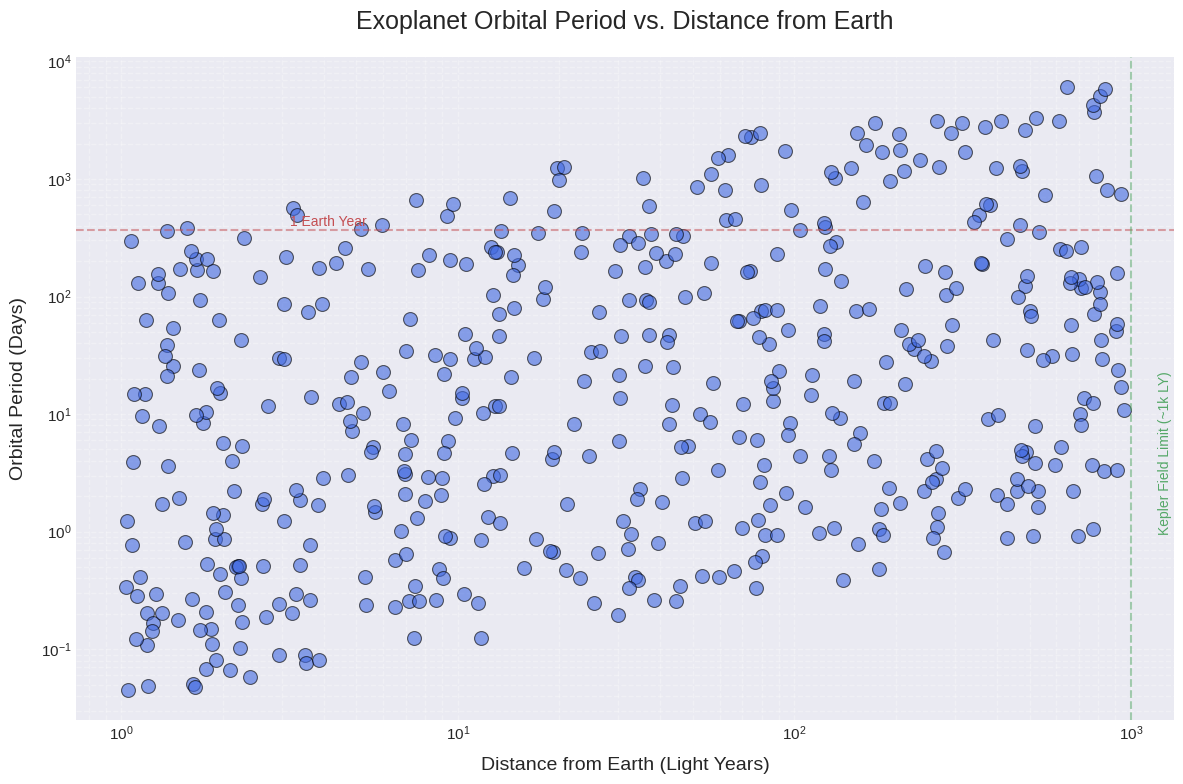

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df['Distance (ly)'],
    y=df['Period (days)'],
    alpha=0.6,
    color='royalblue',
    s=100,
    edgecolor='black'
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Distance from Earth (Light Years)", fontsize=14, labelpad=10)
plt.ylabel("Orbital Period (Days)", fontsize=14, labelpad=10)
plt.title("Exoplanet Orbital Period vs. Distance from Earth", fontsize=18, pad=20)

ax.grid(True, which="both", ls="--", alpha=0.3)

plt.axhline(y=365, color='r', linestyle='--', alpha=0.5)
plt.text(x=10**0.5, y=400, s="1 Earth Year", color='r', fontsize=10)

plt.axvline(x=1000, color='g', linestyle='--', alpha=0.5)
plt.text(x=1200, y=10**0, s="Kepler Field Limit (~1k LY)", color='g', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


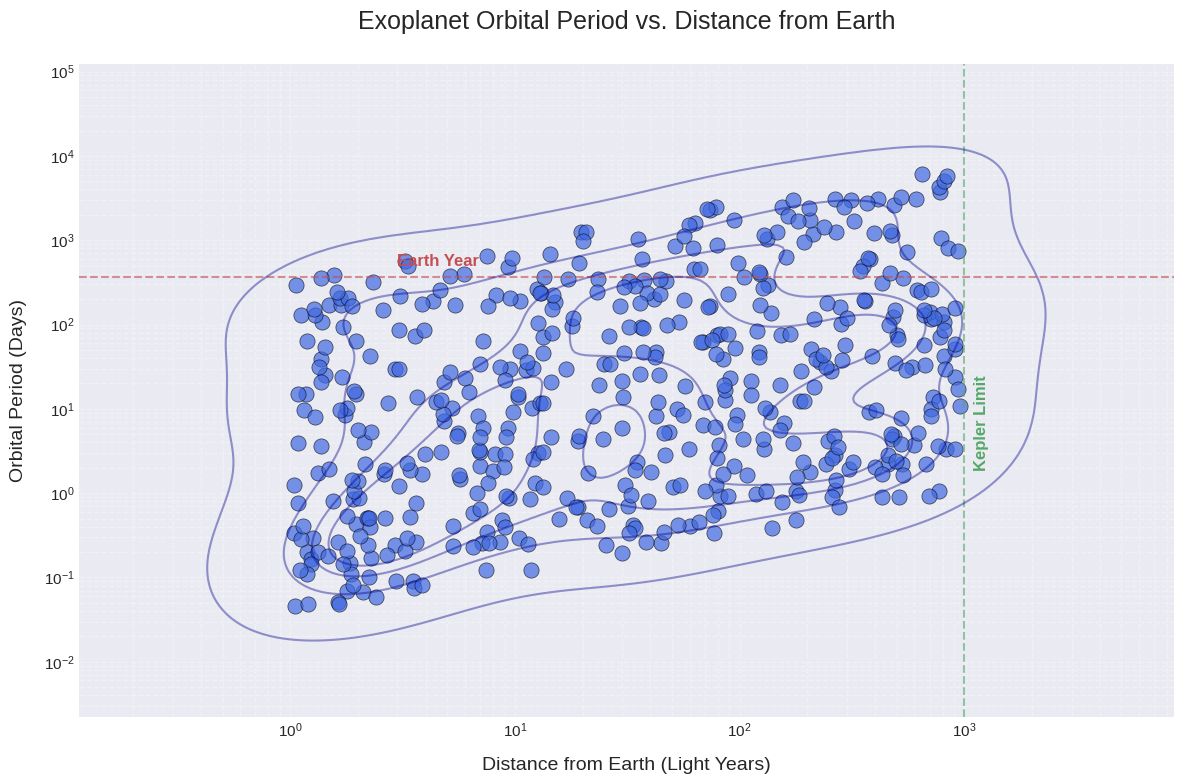

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(42)
distance = 10**np.random.uniform(0, 3, 500)
period = 10**np.random.uniform(0, 4, 500) * (distance/1000)**0.5
df = pd.DataFrame({'Distance (ly)': distance, 'Period (days)': period})

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df['Distance (ly)'],
    y=df['Period (days)'],
    alpha=0.7,
    color='royalblue',
    s=120,
    edgecolor='black',
    linewidth=0.5
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Distance from Earth (Light Years)", fontsize=14, labelpad=12)
plt.ylabel("Orbital Period (Days)", fontsize=14, labelpad=12)
plt.title("Exoplanet Orbital Period vs. Distance from Earth", fontsize=18, pad=25)

ax.grid(True, which="both", ls="--", alpha=0.3)

plt.axhline(y=365, color='r', linestyle='--', alpha=0.6, linewidth=1.5)
plt.text(x=3, y=500, s="Earth Year", color='r', fontsize=12, fontweight='bold')

plt.axvline(x=1000, color='g', linestyle='--', alpha=0.6, linewidth=1.5)
plt.text(x=1100, y=2, s="Kepler Limit", color='g', fontsize=12, rotation=90, fontweight='bold')

sns.kdeplot(x=df['Distance (ly)'], y=df['Period (days)'], 
            levels=5, color='darkblue', alpha=0.4)

plt.tight_layout()
plt.show()

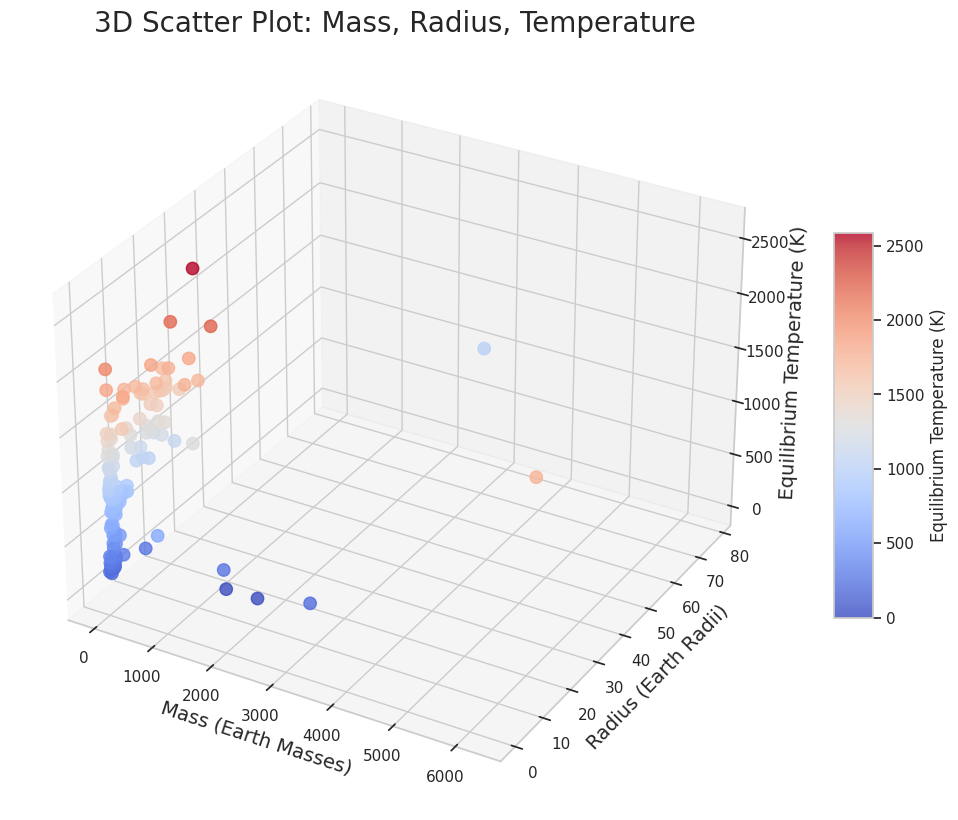

In [36]:
# 3D Scatter plot of Mass, Radius, and Temperature
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Mass (M⊕)'], df['Radius (R⊕)'], df['Teq (K)'], c=df['Teq (K)'], cmap='coolwarm', alpha=0.8, s=80)
ax.set_xlabel("Mass (Earth Masses)", fontsize=14)
ax.set_ylabel("Radius (Earth Radii)", fontsize=14)
ax.set_zlabel("Equilibrium Temperature (K)", fontsize=14)
ax.set_title("3D Scatter Plot: Mass, Radius, Temperature", fontsize=20)
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10, label="Equilibrium Temperature (K)")
plt.show()


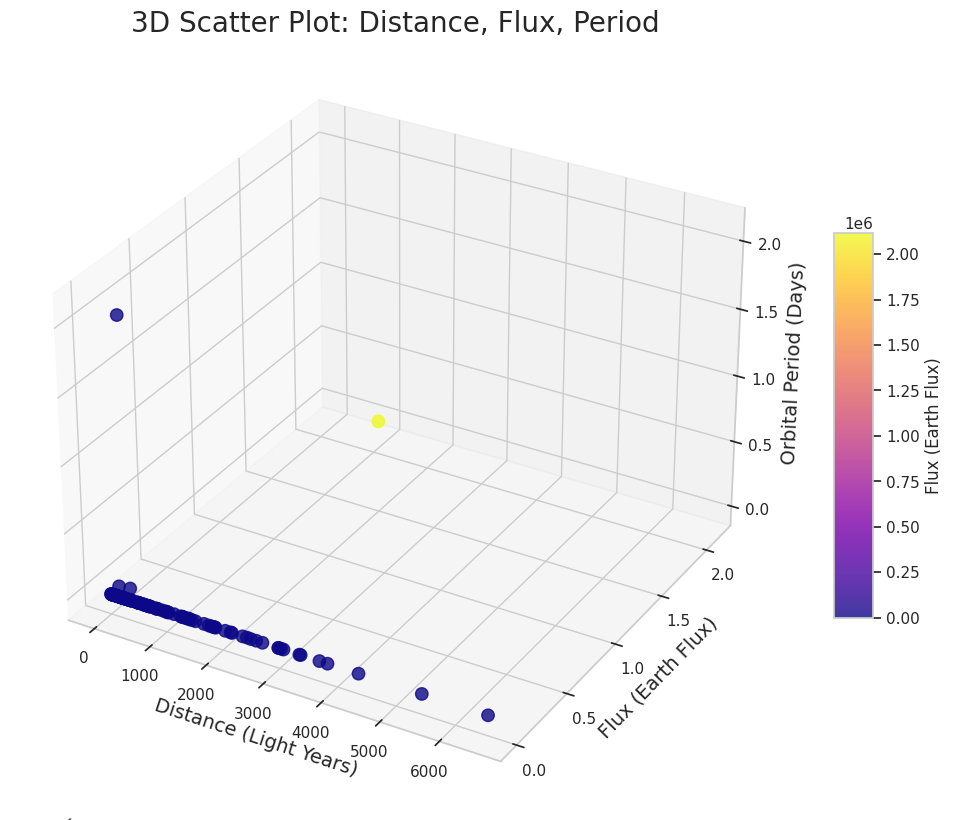

In [37]:
# 3D Scatter plot of Distance, Flux, and Period
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Distance (ly)'], df['Flux (F⊕)'], df['Period (days)'], c=df['Flux (F⊕)'], cmap='plasma', alpha=0.8, s=80)
ax.set_xlabel("Distance (Light Years)", fontsize=14)
ax.set_ylabel("Flux (Earth Flux)", fontsize=14)
ax.set_zlabel("Orbital Period (Days)", fontsize=14)
ax.set_title("3D Scatter Plot: Distance, Flux, Period", fontsize=20)
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10, label="Flux (Earth Flux)")
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

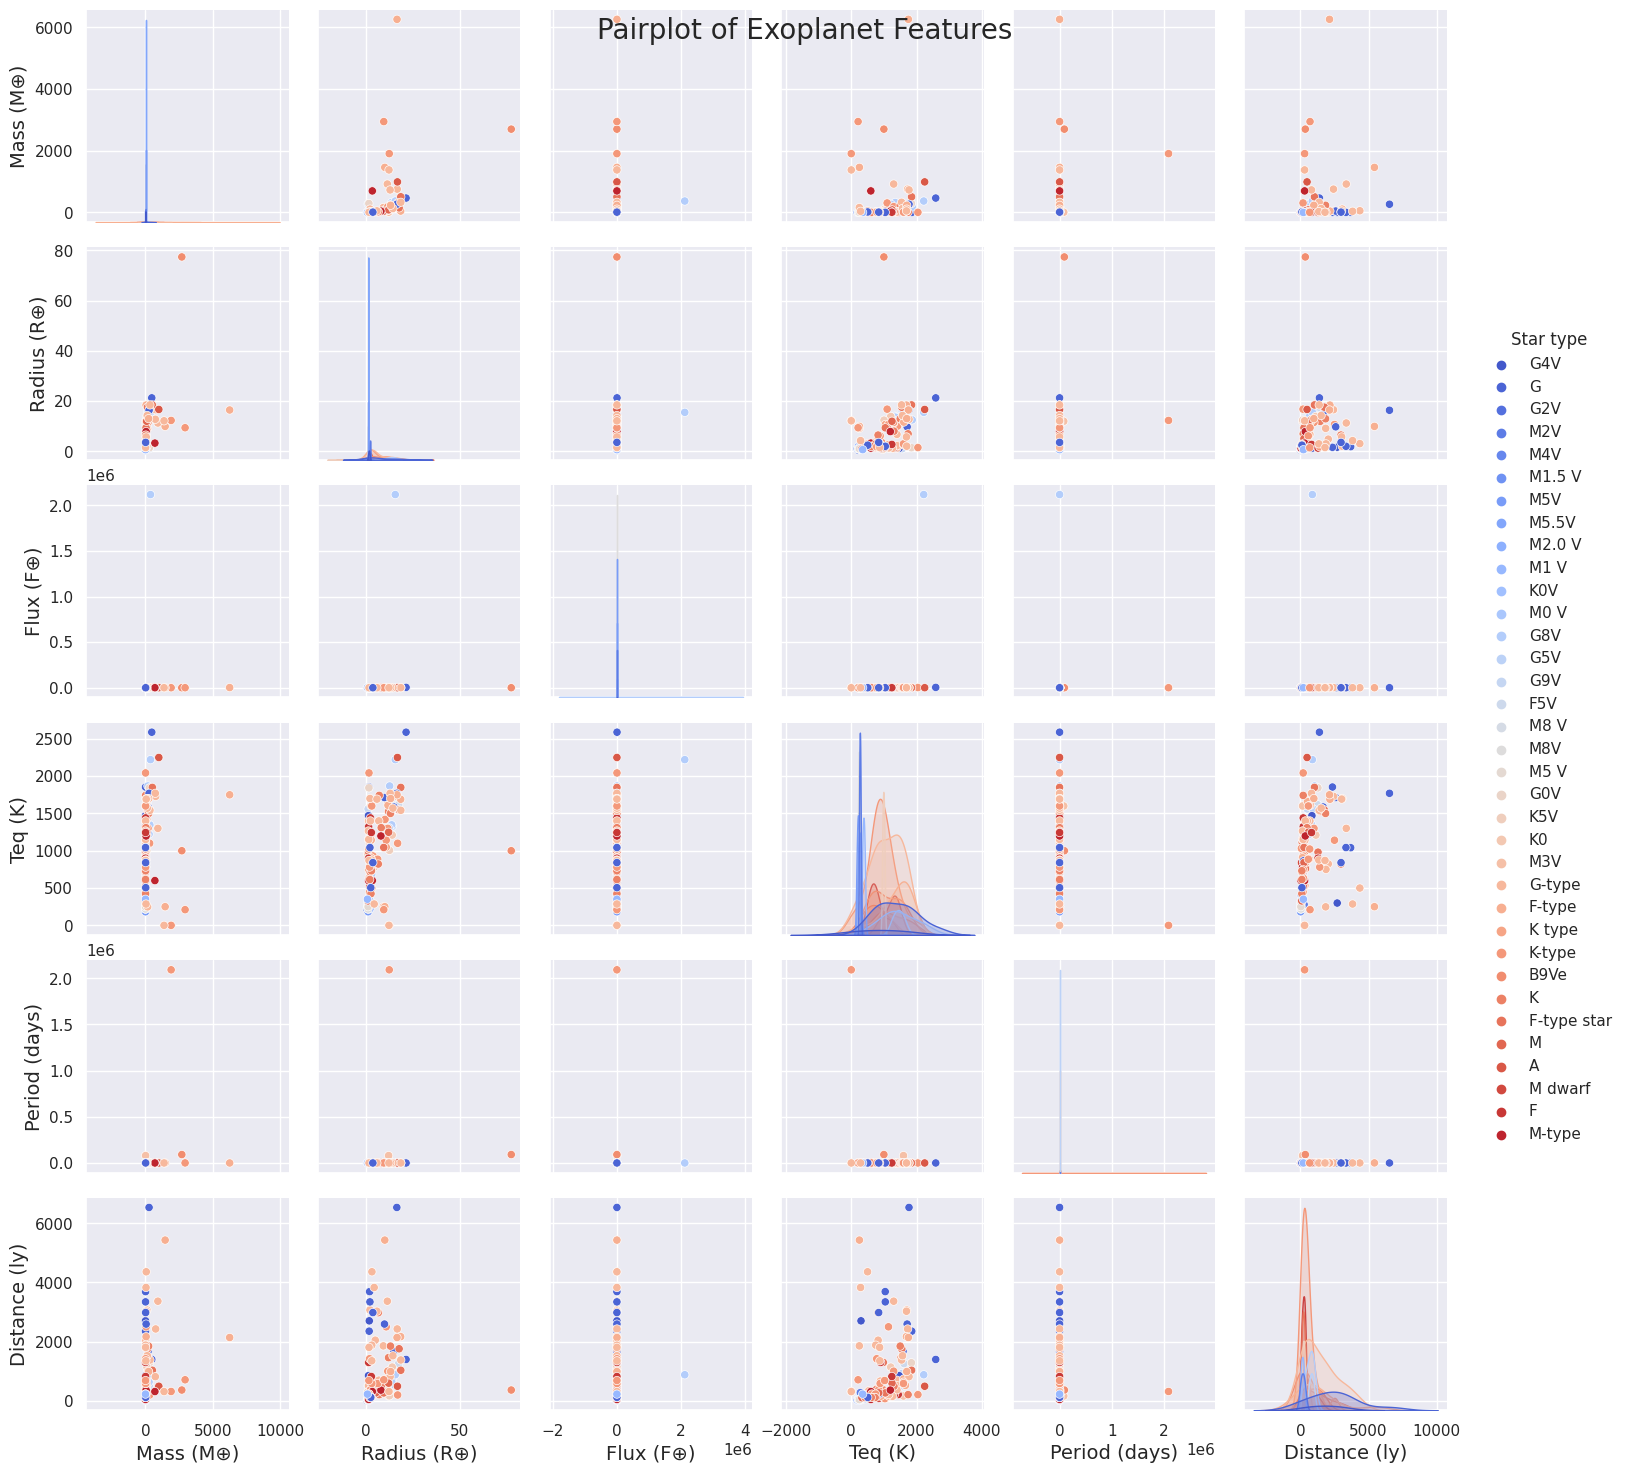

In [19]:

# Pairplot (Seaborn PairGrid)
sns.pairplot(df, hue='Star type', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Exoplanet Features", fontsize=20)
plt.show()


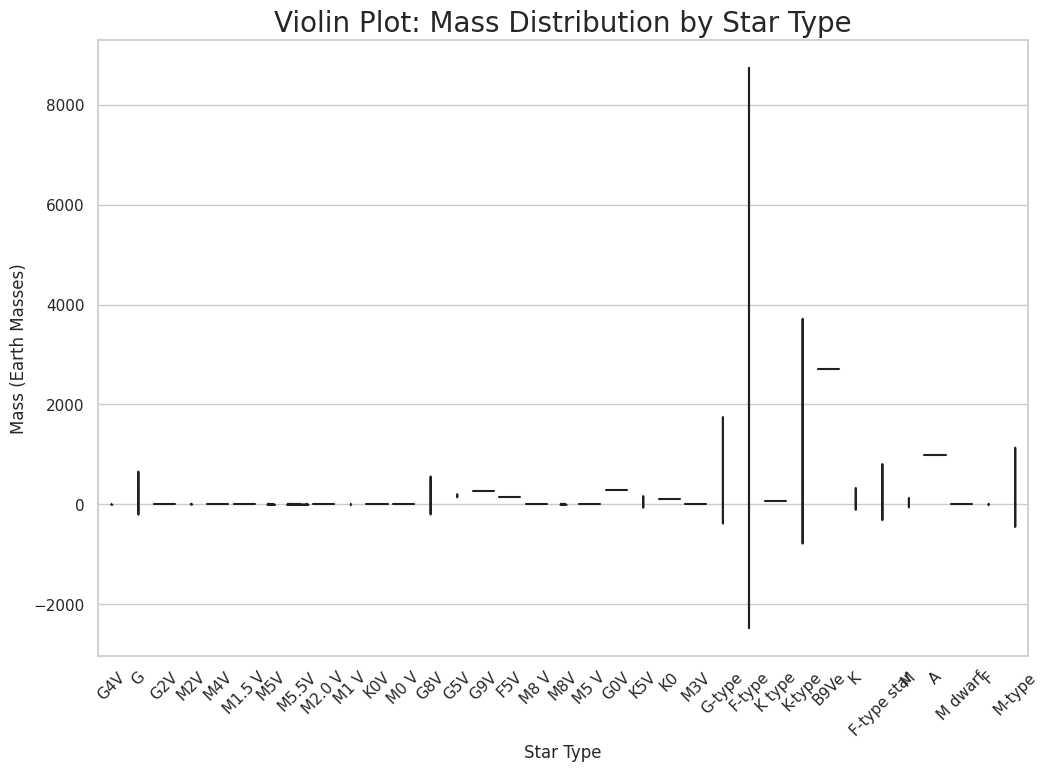

In [38]:
# Violin Plot for Mass Distribution per Star Type
plt.figure(figsize=(12, 8))
sns.violinplot(x=df['Star type'], y=df['Mass (M⊕)'], palette='viridis', inner='quartile')
plt.xlabel("Star Type")
plt.ylabel("Mass (Earth Masses)")
plt.title("Violin Plot: Mass Distribution by Star Type", fontsize=20)
plt.xticks(rotation=45)
plt.show()


In [39]:
features = df.select_dtypes(include=[np.number]).dropna()

# UMAP 
umap_3d = umap.UMAP(n_components=3, random_state=42)
umap_proj = umap_3d.fit_transform(features)

#t-SNE
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_proj = tsne_3d.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


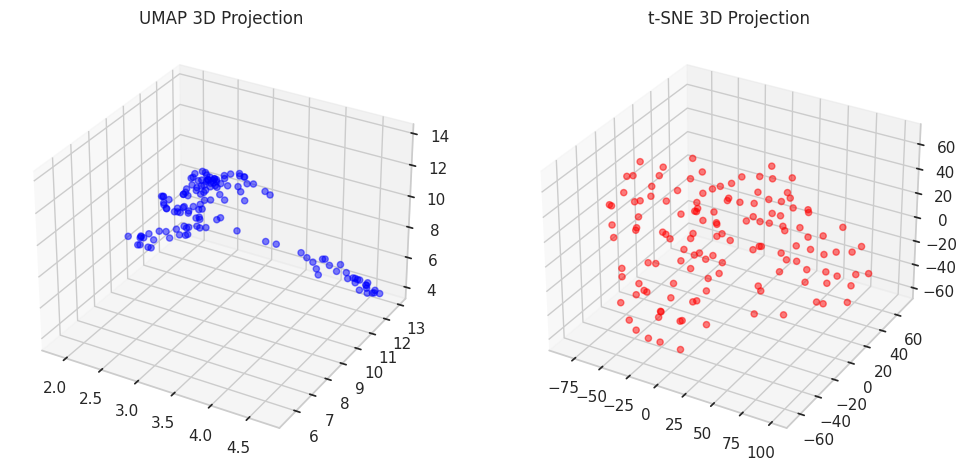

In [41]:
# Plot UMAP 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(umap_proj[:, 0], umap_proj[:, 1], umap_proj[:, 2], c='blue', alpha=0.5)
ax.set_title("UMAP 3D Projection")

# Plot t-SNE 3D
ax = fig.add_subplot(122, projection='3d')
ax.scatter(tsne_proj[:, 0], tsne_proj[:, 1], tsne_proj[:, 2], c='red', alpha=0.5)
ax.set_title("t-SNE 3D Projection")

plt.show()

<ipython-input-60-65abf7ebb051>:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8853 (\N{CIRCLED PLUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


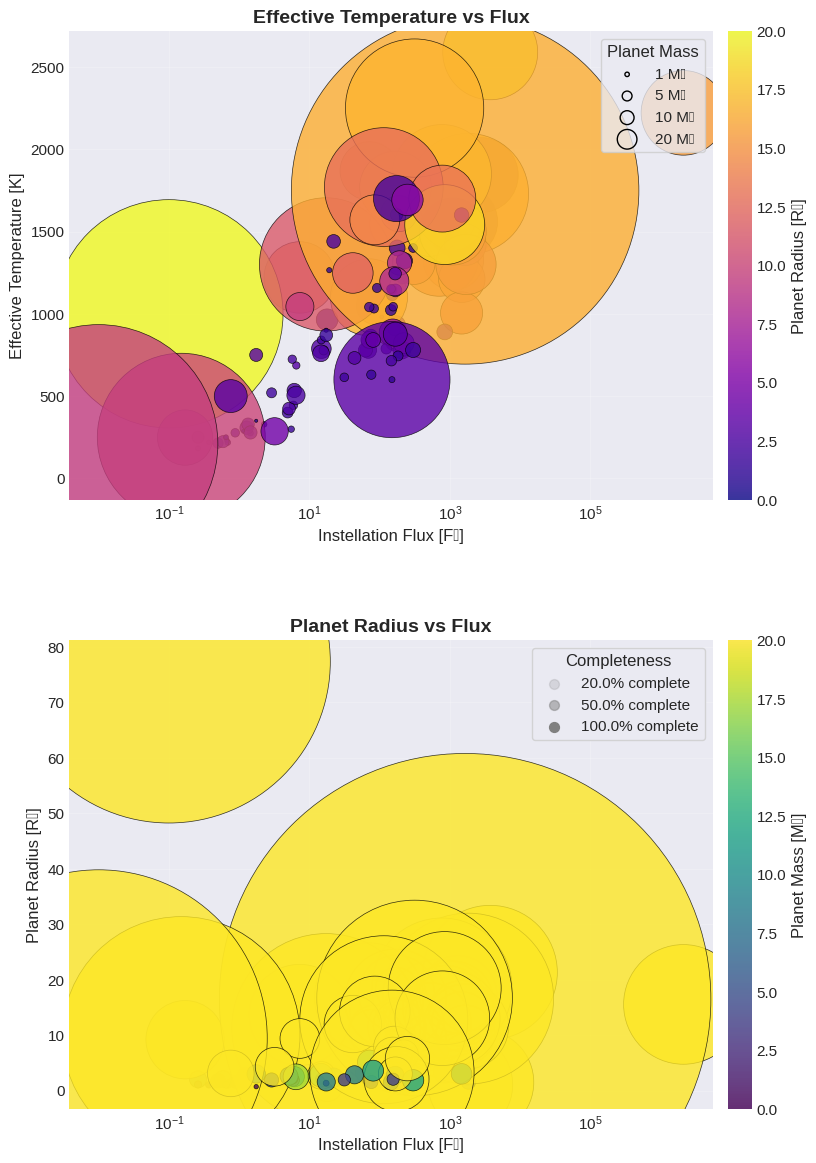

In [60]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(2, 1, figsize=(10, 14), gridspec_kw={'hspace': 0.3})

plt.style.use('seaborn-v0_8-darkgrid')
title_font = {'fontsize': 14, 'fontweight': 'bold'}
label_font = {'fontsize': 12}

# --- Effective Temperature vs Flux ---
sc1 = axes[0].scatter(
    df['Flux (F⊕)'], df['Teq (K)'],
    c=df['Radius (R⊕)'], 
    s=df['Mass (M⊕)'] * 10,  
    cmap='plasma', 
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8,
    vmin=0, 
    vmax=20
)  

axes[0].set_xlabel("Instellation Flux [F⊕]", **label_font)
axes[0].set_ylabel("Effective Temperature [K]", **label_font)
axes[0].set_title("Effective Temperature vs Flux", **title_font)
axes[0].set_xscale('log')
axes[0].grid(True, which="both", ls="-", alpha=0.2)

cbar1 = plt.colorbar(sc1, ax=axes[0], pad=0.02)
cbar1.set_label("Planet Radius [R⊕]", **label_font)

mass_legend = [1, 5, 10, 20]
for mass in mass_legend:
    axes[0].scatter([], [], s=mass*10, c='none', edgecolor='black', 
                   label=f'{mass} M⊕')  # Changed to *10 to match your scatter size
axes[0].legend(title='Planet Mass', loc='upper right', frameon=True)

# --- Second Plot: Planet Radius vs Flux ---
sc2 = axes[1].scatter(
    df['Flux (F⊕)'], df['Radius (R⊕)'],
    c=df['Mass (M⊕)'],
    s=df['Mass (M⊕)'] * 20,  
    cmap='viridis',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8,
    vmin=0,  
    vmax=20 
)

axes[1].set_xlabel("Instellation Flux [F⊕]", **label_font)
axes[1].set_ylabel("Planet Radius [R⊕]", **label_font)
axes[1].set_title("Planet Radius vs Flux", **title_font)
axes[1].set_xscale('log')
axes[1].grid(True, which="both", ls="-", alpha=0.2)

cbar2 = plt.colorbar(sc2, ax=axes[1], pad=0.02)
cbar2.set_label("Planet Mass [M⊕]", **label_font)

reliability_legend = [0.2, 0.5, 1.0]
for rel in reliability_legend:
    axes[1].scatter([], [], c='gray', alpha=rel, s=50, 
                   label=f'{rel*100}% complete')
axes[1].legend(title='Completeness', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

<ipython-input-65-698fdc6f778a>:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8853 (\N{CIRCLED PLUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


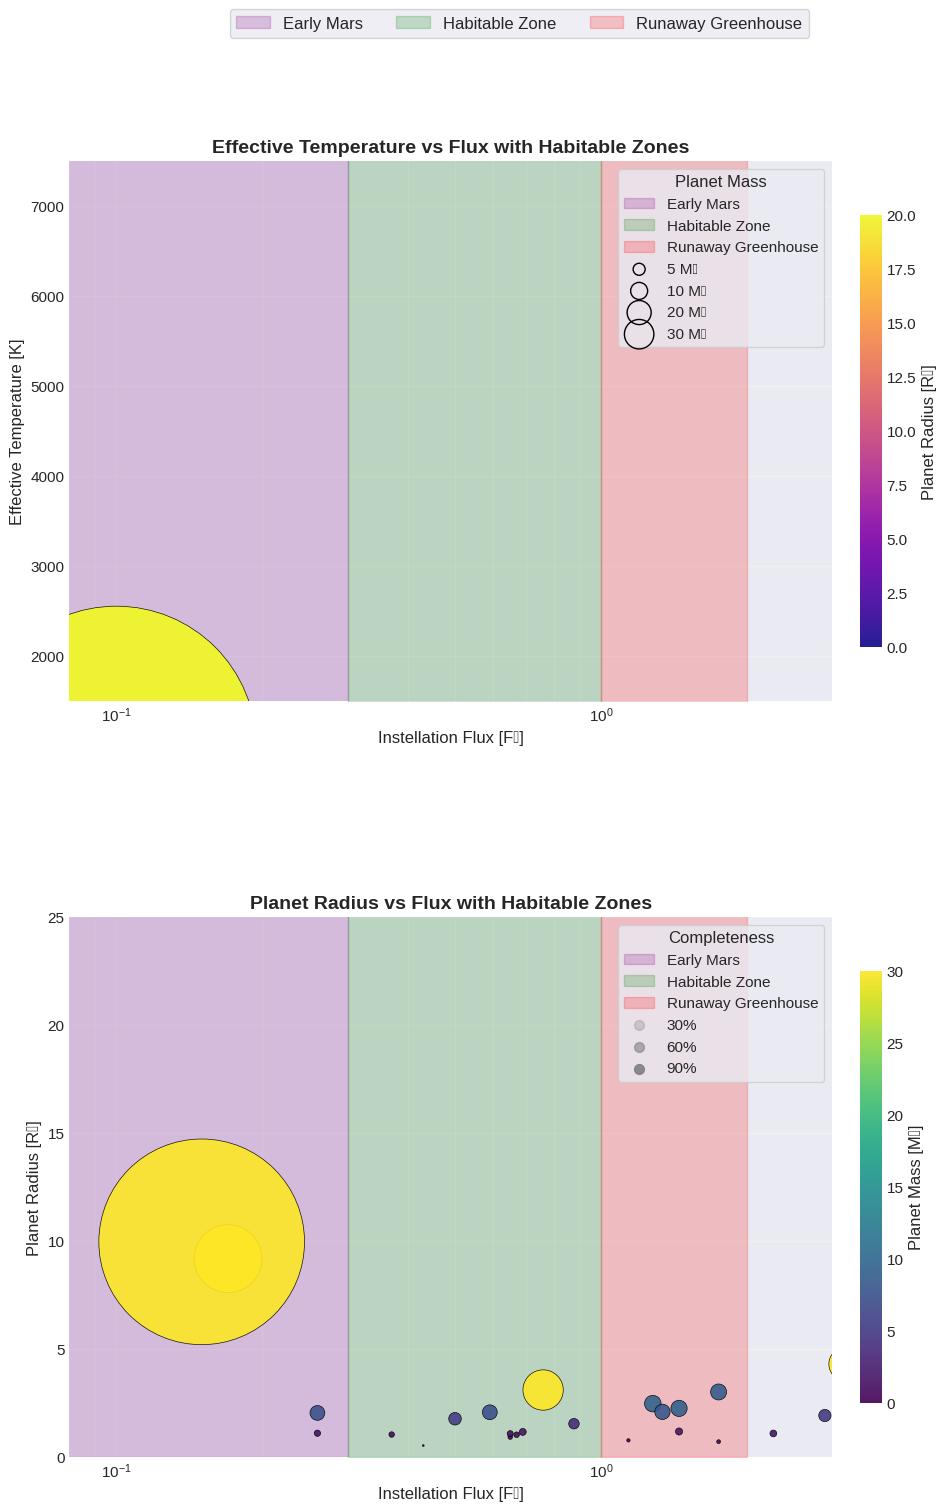

In [65]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(2, 1, figsize=(12, 16), gridspec_kw={'hspace': 0.4})
plt.style.use('seaborn-v0_8-darkgrid')


title_font = {'fontsize': 14, 'fontweight': 'bold'}
label_font = {'fontsize': 12}

zone_alpha = 0.2  
zone_colors = {
    'Early Mars': 'purple',
    'Habitable Zone': 'green',
    'Runaway Greenhouse': 'red'
}

# --- Top Plot: Temperature vs Flux ---
flux_range = np.logspace(-2, 1, 100)  
for name, color in zone_colors.items():
    axes[0].fill_betweenx([0, 8000], *{'Early Mars': (0, 0.3),
                      'Habitable Zone': (0.3, 1.0),
                      'Runaway Greenhouse': (1.0, 2.0)}[name],
                     color=color, alpha=zone_alpha, label=name)


sc1 = axes[0].scatter(
    df['Flux (F⊕)'], df['Teq (K)'],
    c=df['Radius (R⊕)'],  
    s=df['Mass (M⊕)'] * 15,  
    cmap='plasma',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.9,
    vmin=0, vmax=20,  
    zorder=10  
)


axes[0].set_xlabel("Instellation Flux [F⊕]", **label_font)
axes[0].set_ylabel("Effective Temperature [K]", **label_font)
axes[0].set_title("Effective Temperature vs Flux with Habitable Zones", **title_font)
axes[0].set_xscale('log')
axes[0].set_xlim(0.08, 3)  
axes[0].set_ylim(1500, 7500)  
axes[0].grid(True, which="both", ls="-", alpha=0.25)


cbar1 = fig.colorbar(sc1, ax=axes[0], pad=0.03, shrink=0.8)
cbar1.set_label("Planet Radius [R⊕]", **label_font)
cbar1.ax.tick_params(labelsize=11)


mass_legend = [5, 10, 20, 30]
for mass in mass_legend:
    axes[0].scatter([], [], s=mass*15, c='none', 
                   edgecolor='black', label=f'{mass} M⊕')
mass_leg = axes[0].legend(title='Planet Mass', loc='upper right', 
                        frameon=True, prop={'size': 11})
plt.setp(mass_leg.get_title(), fontsize=12)

# --- Bottom Plot: Radius vs Flux ---
for name, color in zone_colors.items():
    axes[1].fill_betweenx([0, 30], *{'Early Mars': (0, 0.3),
                      'Habitable Zone': (0.3, 1.0),
                      'Runaway Greenhouse': (1.0, 2.0)}[name],
                     color=color, alpha=zone_alpha, label=name)


sc2 = axes[1].scatter(
    df['Flux (F⊕)'], df['Radius (R⊕)'],
    c=df['Mass (M⊕)'],  
    s=df['Mass (M⊕)'] * 15, 
    cmap='viridis',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.9,
    vmin=0, vmax=30, 
    zorder=10
)

axes[1].set_xlabel("Instellation Flux [F⊕]", **label_font)
axes[1].set_ylabel("Planet Radius [R⊕]", **label_font)
axes[1].set_title("Planet Radius vs Flux with Habitable Zones", **title_font)
axes[1].set_xscale('log')
axes[1].set_xlim(0.08, 3)  
axes[1].set_ylim(0, 25)  
axes[1].grid(True, which="both", ls="-", alpha=0.25)

# Mass colorbar
cbar2 = fig.colorbar(sc2, ax=axes[1], pad=0.03, shrink=0.8)
cbar2.set_label("Planet Mass [M⊕]", **label_font)
cbar2.ax.tick_params(labelsize=11)


completeness_legend = [0.3, 0.6, 0.9]
for comp in completeness_legend:
    axes[1].scatter([], [], c='gray', alpha=comp, s=50, label=f'{comp*100:.0f}%')
comp_leg = axes[1].legend(title='Completeness', loc='upper right', 
                        frameon=True, prop={'size': 11})
plt.setp(comp_leg.get_title(), fontsize=12)

handles, labels = axes[0].get_legend_handles_labels()
fig_leg = fig.legend(handles[:3], labels[:3], loc='upper center', 
                    ncol=3, bbox_to_anchor=(0.5, 1.02),
                    frameon=True, prop={'size': 12})


plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Space for top legend
plt.show()